In [97]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

## Initial Checking

In [98]:
# Read the data
data = pd.read_csv('Apiary_Data Analyst Internship Test.csv', delimiter=';')
data.head()

,Name,Email,Phone Number,Job Title,Company,Expertise,Events Name,Main purpose joining the event,Information Source
0,Dhaval Khant,dhbvblk.spbzeo@gzbil.zoz,-9863535333,Product Manager,SpaceO Tehnologies,Product Management,NaN,NaN,Community
1,anmol,bnzol@brgoid.zoz,-9931605061,Product Manager,Argoid,Product Management,NaN,NaN,Community
2,SIDDHARTH,siddhbrth.zbnnbn@pintek.id,-8900819950,Product Manager,Pintek,Product Management,NaN,NaN,Community
3,X,ronower609@liepbib.zoz,163368,Analyst,XXx,Data,NaN,NaN,LinkedIn
4,WEI LIEW,weihbn.liew@zbingbzes.zoz,86666338,Founder,Main Games,Business Owner/Entrepreneur,NaN,NaN,Community


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Name                            345 non-null    object 
 1   Email                           345 non-null    object 
 2   Phone Number                    345 non-null    object 
 3   Job Title                       344 non-null    object 
 4   Company                         344 non-null    object 
 5   Expertise                       345 non-null    object 
 6   Events Name                     0 non-null      float64
 7   Main purpose joining the event  0 non-null      float64
 8   Information Source              344 non-null    object 
dtypes: float64(2), object(7)
memory usage: 24.4+ KB


Diperoleh informasi awal mengenai dataset, antara lain:
- Jumlah entri awal data sebanyak 345 entri baris data
- Terdapat 9 buah kolom, yaitu Name, Email, Phone Number, Job Title, Company, Expertise, Events Name, Main purpose joining the event, dan Information Source
- Tipe data seluruh kolom kecuali Events Name dan Main purpose joining the event berupa object string
- Tipe data Events Name dan Main purpose joining the event bertipe float meskipun seharusnya entri kolom ini berupa teks (object string). Dapat dicurigai bahwa kedua kolom ini bernilai NaN seluruhnya.

In [100]:
# Check numerical columns
data.describe()

,Events Name,Main purpose joining the event
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


Terlihat bahwa kedua kolom ini bernilai NaN seluruhnya sehingga terdeteksi bertipe data float pada python.

In [101]:
# Checking categorical columns
data.describe(include='object')

,Name,Email,Phone Number,Job Title,Company,Expertise,Information Source
count,345,345,345,344,344,345,344
unique,318,309,293,200,276,9,14
top,Laurentius Wiragni Sanjaya,wirbgnizgi@gzbil.zoz,"6,68516E+12",Product Manager,-,Other,Others
freq,3,3,4,22,25,104,55


Dari informasi di atas, diperoleh bahwa pada kolom Name dan Email terdapat entri data yang serupa. Dengan demikian, perlu pemeriksaan lebih lanjut terhadap kehadiran data duplikat pada dataset.

In [102]:
# Checking null/missing values
data.isnull().sum()

Name                                0
Email                               0
Phone Number                        0
Job Title                           1
Company                             1
Expertise                           0
Events Name                       345
Main purpose joining the event    345
Information Source                  1
dtype: int64

In [103]:
# Further checking the entry of both Events Name and Main purpose joining the event columns
print(data['Events Name'].unique())
print(data['Main purpose joining the event'].unique())

[nan]
[nan]


Terlihat bahwa dari 345 titik data, terdapat 345 data kosong (100% null values) pada kolom Events Name dan kolom Main Purpose Joining the Event sehingga akan dilakukan dropping pada kedua kolom ini. Sementara itu, terdapat null values masing-masing sebanyak 1 buah pada kolom Job Title, Company, dan Information Source. Dengan demikian, perlu dilakukan penanganan null values lebih lanjut pada ketiga kolom tersebut. Perlu dicatat bahwa null values yang terdeteksi ini merupakan entri data yang memang benar-benar kosong atau bertipe data NaN pada python.

## Null Values Handling

### Events Name dan Main purpose joining the event Columns

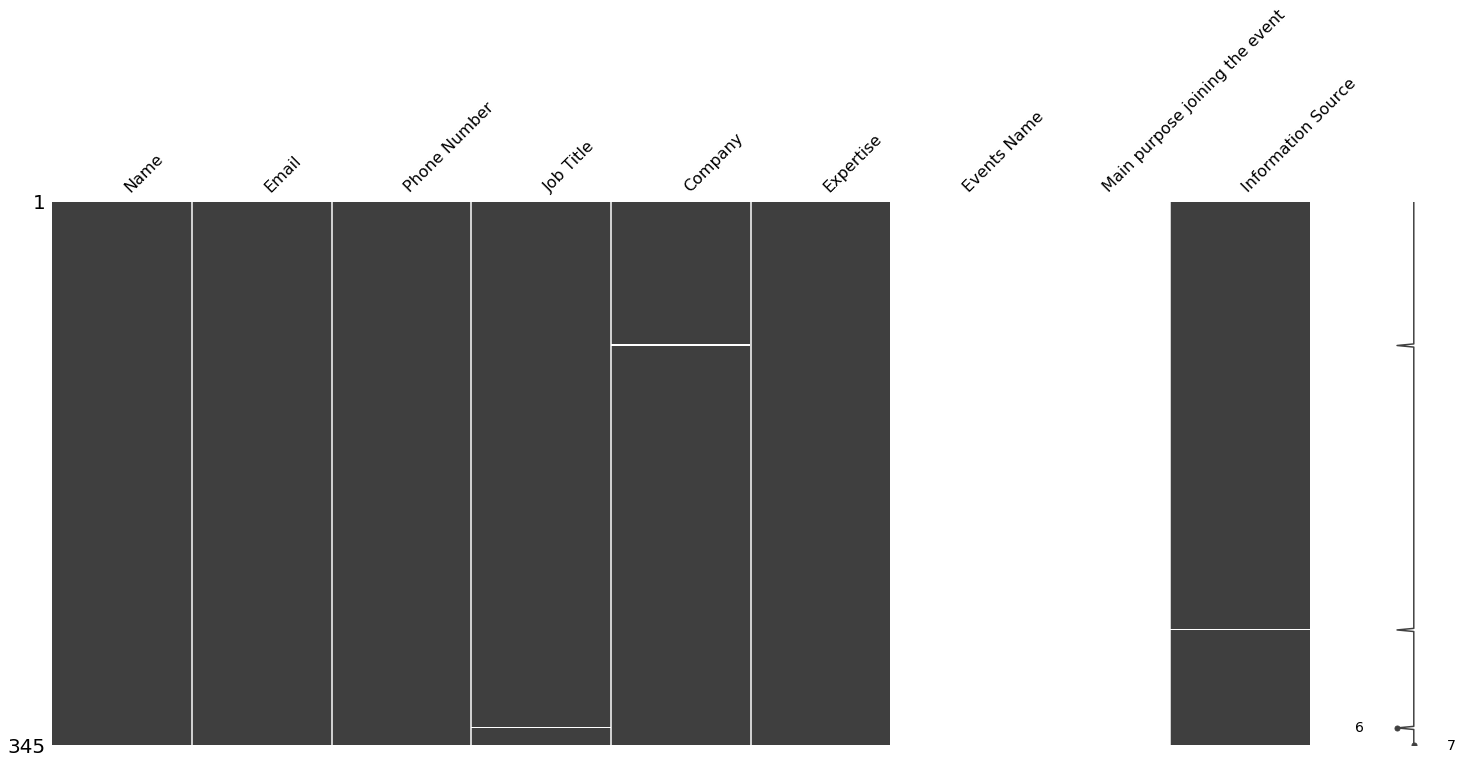

In [104]:
# Visualizing null values in the dataset
msno.matrix(data)

Dari visualisasi di atas, dapat terlihat sebaran null values pada dataset di mana sumbu mendatar merupakan kolom dan sumbu tegak merupakan indeks baris data. Terlihat bahwa kolom Events Name dan Main purpose joining the event memiliki 100% null values dan terdapat null values pada kolom Job Title, Company, dan Information Source.

In [105]:
# Drop Events Name dan Main purpose joining the event
data = data.drop(['Events Name', 'Main purpose joining the event'], axis = 1)
data.isnull().sum()

Name                  0
Email                 0
Phone Number          0
Job Title             1
Company               1
Expertise             0
Information Source    1
dtype: int64

In [106]:
# Locate the remaining missing values
data.loc[data['Job Title'].isnull()
         | data['Company'].isnull()
         | data['Information Source'].isnull()]

,Name,Email,Phone Number,Job Title,Company,Expertise,Information Source
91,Diana Pratiwi,deedeeprbtiwi@gzbil.zoz,81688160309,Unemployed,NaN,Student/Fresh Graduate,Email
271,Dicky Haarits Zairul,dizky.hbbrits.z@gzbil.zoz,"6,68614E+12",Associate Product Owner,Cermati Fintech Group,Product Management,NaN
333,Yuliana Firdaus,yulibnbfirdbus21@gzbil.zoz,"6,68961E+17",NaN,-,Other,Others


### Company Column: Null Values Handling

In [107]:
# Check unique values of Company column
print(data['Company'].unique())

['SpaceO Tehnologies' 'Argoid' 'Pintek' 'XXx' 'Main Games'
 'Mixpanel APAC Pte. Ltd' 'Irrelevant' 'EasyStore' 'Qwerty' 'April Inch'
 'PT Smartfren' 'Bintang Kecil' 'Apiary Coworking Space' 'SHOPLINE'
 'Paxel' 'LiveLife' 'LJI' 'SignEasy' 'Airtel' 'BPJAMSOSTEK' 'oktave'
 'Blue Bird' 'Optimasi.ai' 'Invi Design' 'Jabar Digital Service'
 'Petrocina ltd' 'Fintax' 'Onevision' 'BCA Digital' 'Ex Pintar Ventura'
 '-' 'PT. Yokogawa Indonesia' 'podomoro university' 'aldoapp' 'STIAMI'
 'ternakuang' 'Here Technologies' 'Apiary' 'Ahmad Farid Ahsani Taqwim'
 'SBMITB Jakarta' 'Signeasy' 'Jubelio' 'CV Nuriana'
 'Kautsar Store Indonesia' 'Alto' 'Ramaga' 'Oy Indonesia'
 'Universitas Tarumanagara' 'CLOUDLYTICS' 'Bureau' 'SHASTHA Systems'
 'Zinier' 'Paytm' 'The House Monk' 'Recurpay' 'Entytle Inc' 'NGO'
 'Edudemy Labs' 'vPhrase Analytics Solutions Pvt Ltd' 'IFFCO Kisan'
 'Infor' 'Northeastern university' 'RecurPost' 'Discovery'
 'Podomoro University' 'Paques' 'Moladin' 'Institut Teknologi Kalimantan'
 'BP' 

Diperoleh informasi bahwa pada kolom Company, terdapat entri berupa '-'. Dengan demikian, null values pada kolom Company dapat diimputasi dengan entri tersebut.

In [108]:
data.loc[data['Company']=='-']

,Name,Email,Phone Number,Job Title,Company,Expertise,Information Source
31,Randityo Jiwo Prakoso,rbndi.prbkoso@gzbil.zoz,8196053359,Freelance,-,Other,Email
34,Nurlaili Azizah,bzizbh.nurlbili@yzbil.zoz,8563183035,Freelance,-,Other,LinkedIn
76,NOVITA ASTARI SABRINA,bqubzbrinerbito@gzbil.zoz,81663363390,on jobhunting,-,Student/Fresh Graduate,Instagram
165,WIBBY SETIADI RACHMAN,wibbysr20@gzbil.zoz,85869335395,-,-,Other,Ads
167,Ni Nyoman Dinda Rahayu Dangin,dindbrbhbyudbngin@gzbil.zoz,85953901991,Mahasiswi,-,Student/Fresh Graduate,Others
184,Fathimah Nur Shabrina,fnshbbrinb@gzbil.zoz,89883301630,Student,-,Student/Fresh Graduate,Email
188,catarina apriliana dessy,bprilibnbdessy1997@gzbil.zoz,89619136036,-,-,Other,Instagram
192,Rina Damayanti,riririnb02@gzbil.zoz,89691595333,-,-,Other,Email
198,LIEVIA,lievibhbrtbni@ybhoo.zoz,"6,68117E+11",Mahasiswa,-,Student/Fresh Graduate,Community
213,Faysen Tandean,fbysentbndebn@gzbil.zoz,"6,68997E+11",PMO,-,Product Management,Others


Mayoritas entri '-' pada kolom Company memiliki Job Title berupa mahasiswa, fresh graduate, serta freelancers yang tentu masih belum bekerja secara formal.

In [109]:
# Imputing Company column with (-)
data['Company'] = data['Company'].fillna('-')

### Job Title Column: Null Values Handling

In [110]:
# Check unique values of Job Title column
print(data['Job Title'].unique())

['Product Manager' 'Analyst' 'Founder' 'Marketing' 'Irrelevant' 'PM'
 'marketing' 'Vice President' 'founder' 'pdmkt'
 'Strategy, Finance & Planning SVP' 'SDE' 'Researcher' 'Assistant Manager'
 'owner' 'Product Manager Intern' 'Content Creator' 'Swasta'
 'Product manager' 'Director' 'Product Mgr' 'Customer Success' 'Freelance'
 'Sales Manager' 'student' 'dev' 'IT Manager' 'operational'
 'Sr. Technical Product Management' 'Event and Community' 'Pustakawan'
 'IT Support & Helpdesk' 'Product Management' 'Operation Manager'
 'Branch Coordinator' 'Student' 'Product' 'Business Development'
 'Marketing Lead' 'Product marketer' 'Sr Director of Product'
 'Marketing Manager' 'Director of Business'
 'Sr. Manager - Product Operations, Engagement, Analytics' 'EA' 'pm'
 'Head, Agri-Tech' 'Da' 'Pm' 'PMO & Analytics' 'Lecturer' 'Project'
 'Helpdesk Engineer' 'Associate Product Manager' 'Marketinh'
 'Product Analyst' 'on jobhunting' 'Project Management Officer'
 'Success lead' 'Freelancer' 'IT Project M

Diperoleh informasi bahwa pada kolom Job Title, terdapat entri berupa '-'. Dengan demikian, null values pada kolom Job Title dapat diimputasi dengan entri tersebut.

In [111]:
data.loc[data['Job Title'] == '-']

,Name,Email,Phone Number,Job Title,Company,Expertise,Information Source
85,Zen Pardosi,zenfbny54@gzbil.zoz,81660593139,-,Zen Pardosi,Other,Instagram
107,Nuril,bhzdnrl10@gzbil.zoz,81905198696,-,nm,Other,Community
165,WIBBY SETIADI RACHMAN,wibbysr20@gzbil.zoz,85869335395,-,-,Other,Ads
188,catarina apriliana dessy,bprilibnbdessy1997@gzbil.zoz,89619136036,-,-,Other,Instagram
192,Rina Damayanti,riririnb02@gzbil.zoz,89691595333,-,-,Other,Email
278,Sonia Dwi Respati,sonibd.respbti@gzbil.zoz,"6,68516E+12",-,-,Other,LinkedIn
298,Salsabila Miftah Rezkia,sblsbbilbziftbhr@gzbil.zoz,"6,68993E+12",-,-,Other,Instagram
321,Vanya Komara Putri,vbnybkozbrbputri@gzbil.zoz,"6,68136E+17",-,-,Other,Instagram
335,AHMAD,bbl.pirbtes16@gzbil.zoz,-,-,-,Other,Facebook
336,Nadia,nbdibfresti@gzbil.zoz,-,-,-,Student/Fresh Graduate,Others


Mayoritas entri '-' pada Job Title memiliki Company berupa '-' pula. Dengan demikian, kasus null/missing values pada kedua kolom Job Title dan Company memiliki hubungan dan entri '-' dapat dikatakan bersifat missing at random (MAR).

In [112]:
# Imputing Job Title column with (-)
data['Job Title'] = data['Job Title'].fillna('-')

### Information Source Column: Null Values Handling

In [113]:
# Checking unique values of Information Source Column
print(data['Information Source'].unique())

['Community' 'LinkedIn' 'Others' 'Instagram' ' Email' 'Ads' 'Email' 'Ads '
 ' LinkedIn' 'Loket.com' ' Instagram' 'Meetup' 'Facebook' ' Community' nan]


Diperoleh informasi bahwa pada kolom Information Source, terdapat entri berupa 'Others'. Dengan demikian, null values pada kolom Information Source dapat diimputasi dengan entri tersebut.

In [114]:
data.loc[data['Information Source'] == 'Others']

,Name,Email,Phone Number,Job Title,Company,Expertise,Information Source
5,serene ho,serene.ho@zixpbnel.zoz,83686303,Marketing,Mixpanel APAC Pte. Ltd,Marketing,Others
9,Melissa Poh,zelissb-1010@hotzbil.zoz,196300616,marketing,April Inch,Marketing,Others
18,Raj Chandra,rbj.zhbndrb@signebsy.zoz,9091385533,SDE,SignEasy,Other,Others
33,Marjorie Jovanca,joriejovbnzb@gzbil.zoz,8388158966,student,podomoro university,Student/Fresh Graduate,Others
36,Rachmad Solik,rbzhzbd2007@gzbil.zoz,8569061635,IT Manager,STIAMI,Web/Software Developer,Others
37,eunike,yosefinbeunike@gzbil.zoz,8989896850,operational,ternakuang,Other,Others
39,Muhammad Revy Maghriza,revyzbghrizb98@gzbil.zoz,8881919336,Event and Community,Apiary,Other,Others
42,Aasra Paul,pbulbbsrb@gzbil.zoz,8903666695,Product Management,Signeasy,Product Management,Others
56,Sweta Mohanty,swetb@rezurpby.zoz,9916516389,Director of Business,Recurpay,Business Owner/Entrepreneur,Others
58,Geetha Kaushik,geethb_kbushik@ybhoo.zo.in,9996369633,EA,NGO,Other,Others


In [115]:
# Imputing Job Title column with 'Others'
data['Information Source'] = data['Information Source'].fillna('Others')

In [116]:
# Check missing values
data.isnull().sum()

Name                  0
Email                 0
Phone Number          0
Job Title             0
Company               0
Expertise             0
Information Source    0
dtype: int64

Terlihat bahwa null values pada dataset telah terhandle.

In [117]:
# Copying the cleaned dataset
data_cleaned = data.copy()

## Initial Duplicates Handling

In [118]:
# Checking data duplicates
data_cleaned.loc[data_cleaned.duplicated(keep=False)]

,Name,Email,Phone Number,Job Title,Company,Expertise,Information Source
121,Novia Nurhidayah Prihatiningtyas,novibnurhidbybhp@gzbil.zoz,86618360889,Freshgraduate,Telkom University,Student/Fresh Graduate,LinkedIn
122,Novia Nurhidayah Prihatiningtyas,novibnurhidbybhp@gzbil.zoz,86618360889,Freshgraduate,Telkom University,Student/Fresh Graduate,LinkedIn
238,Ruth Elgiana Ester Simangunsong,ruthelgibnbestersizbngunsong@gzbil.zoz,"6,68166E+12",Fresh graduate,-,Student/Fresh Graduate,Email
239,Ruth Elgiana Ester Simangunsong,ruthelgibnbestersizbngunsong@gzbil.zoz,"6,68166E+12",Fresh graduate,-,Student/Fresh Graduate,Email
273,Martha,zbrthbswebinbr@gzbil.zoz,"6,68664E+12",Student,UAJY,Student/Fresh Graduate,Loket.com
274,Martha,zbrthbswebinbr@gzbil.zoz,"6,68664E+12",Student,UAJY,Student/Fresh Graduate,Loket.com
288,Badrud Tamam,btbedrud@gzbil.zoz,"6,68554E+12",PMT,KEB,Product Management,Others
289,Badrud Tamam,btbedrud@gzbil.zoz,"6,68554E+12",PMT,KEB,Product Management,Others


In [119]:
# Only keep the last occurence of each duplicates
data_cleaned = data_cleaned.drop_duplicates(keep='last')
data_cleaned.duplicated(keep=False).sum()

0

Terlihat bahwa duplikat pada data telah terhandle dengan baik secara umum. Selanjutnya akan dilakukan analisis data duplikat lanjutan berdasarkan setiap variabel yang dianalisis dan dilakukan duplicates handling.

## Exploratory Data Analysis

### Name

In [121]:
# Checking duplicates based on Name column
data_cleaned.loc[data_cleaned['Name'].str.lower().duplicated(keep=False)]

,Name,Email,Phone Number,Job Title,Company,Expertise,Information Source
30,PARULYIAN BENNY ASHARY,pbrulyibn.benny@gzbil.zoz,8161666395,Customer Success,Ex Pintar Ventura,Other,Email
60,Aliasgar Haji,blibsgbr.hbji@vphrbse.zoz,9989811191,PM,vPhrase Analytics Solutions Pvt Ltd,Product Management,Email
61,Aliasgar Haji,blibsgbr.hbji@vphrbse.zoz,9989811191,pm,vPhrase Analytics Solutions Pvt Ltd,Product Management,Email
80,Fawwaz Roja Mahardika,fbwwbzrodikb@gzbil.zoz,81656356608,Associate Product Manager,Alodokter,Product Management,Email
81,Fawwaz Roja Mahardika,fbwwbzrodikb@gzbil.zoz,81656356608,Associate Product Manager,Alodokter,Product Management,LinkedIn
84,Zen pardosi,zenfbny54@gzbil.zoz,81660593139,Junior Product Manager,PT Justika Siar Publika,Product Management,Email
85,Zen Pardosi,zenfbny54@gzbil.zoz,81660593139,-,Zen Pardosi,Other,Instagram
89,Yasier,ybsierutbzb@gzbil.zoz,81683336303,Sales Director,JPI,Marketing,Others
90,Yasier,ybsierutbzb@gzbil.zoz,81683336303,Sales Director,JPI,Marketing,Email
113,Inrasopa,inrbrindi@gzbil.zozzoz,86151380336,Mahasiswa,Unibos,Student/Fresh Graduate,Email


In [122]:
# Drop duplicates with only keeping the last occurence of each duplicates
duplicates = data_cleaned.loc[data_cleaned['Name'].str.lower().duplicated(keep='last')].index
data_cleaned = data_cleaned.drop(duplicates)
data_cleaned['Name'].str.lower().duplicated(keep=False).sum()

0

Data duplikat telah terhandle dengan baik.

In [123]:
# Set Name column to a uniformed-uppercased-strings
data_cleaned['Name'] = data_cleaned['Name'].str.upper()
data_cleaned['Name']

0              DHAVAL KHANT
1                     ANMOL
2                 SIDDHARTH
3                         X
4                  WEI LIEW
               ...         
340           AYA MATSUMOTO
341          GURPREET SINGH
342          HEMA RAMASWAMY
343    DICKY HAARITS ZAIRUL
344              BELA NONIK
Name: Name, Length: 312, dtype: object

### Email

In [125]:
# Further checks of duplicates based on Email column
data_cleaned.loc[data_cleaned['Email'].str.lower().duplicated(keep=False)]

,Name,Email,Phone Number,Job Title,Company,Expertise,Information Source
92,HARIS PRASETYO,hbris.prbsetyo09@gzbil.zoz,81689863369,Consultant,Narapatih,Other,LinkedIn
93,ANINDISA HARIS PRASETYO,hbris.prbsetyo09@gzbil.zoz,81689863369,Project Manager,ClueUp,Product Management,Ads
145,TRIO RAHMAY,triorbhzbt01@gzbil.zoz,85161699965,Product Manager,Accurate,Product Management,Facebook
196,ABDUL FURQON,furqonzbz3@gzbil.zoz,"6,68112E+11",Bisnis Owner,Innotech,Business Owner/Entrepreneur,Email
253,TRIO RAHMAT,triorbhzbt01@gzbil.zoz,"6,68139E+12",Product manager,Accurate Indonesia,Product Management,LinkedIn
259,FAHMY MONTGOMERY LAUTE,fbhzy.lbute@gzbil.zoz,"6,68181E+12",knowledge partner,lynk global,Other,Email
312,DUL UQON,furqonzbz3@gzbil.zoz,"6,68116E+16",Sr IT Bisnis Analis,Inno,Data,Instagram
323,FAHMY,fbhzy.lbute@gzbil.zoz,"6,68181E+17",knowledge partner,lynk global,Other,Email


In [126]:
# Drop duplicates with only keeping the last occurence of each duplicates
duplicates = data_cleaned.loc[data_cleaned['Email'].str.lower().duplicated(keep='last')].index
data_cleaned = data_cleaned.drop(duplicates)
data_cleaned['Email'].str.lower().duplicated(keep=False).sum()

0

Data duplikat telah terhandle dengan baik.

### Phone Number

In [127]:
data_cleaned['Phone Number'].unique()

array(['-9863535333', '-9931605061', '-8900819950', '163368', '86666338',
       '83686303', '85633639', '106686318', '163163163', '196300616',
       '811989851', '818193601', '899999999', '963550661', '6166985366',
       '6596851130', '9060911866', '9091385533', '9963063509',
       '8111131080', '8111163650', '8111196606', '8118086395',
       '8161801995', '8166665606', '8169896560', '8156100885',
       '8158009613', '8159399836', '8196053359', '8196660931',
       '8388158966', '8563183035', '8563636363', '8569061635',
       '8989896850', '8899093339', '8881919336', '8888661199',
       '8889610518', '8903666695', '8993910180', '8999360999',
       '8999990909', '8988363939', '8988566856', '8998169063',
       '8998808900', '9069596996', '9630853560', '9936693931',
       '9810016335', '9860918398', '9885833611', '9916516389',
       '9930690809', '9996369633', '9996950909', '9989811191',
       '9999033139', '15086159316', '18593099095', '19316690303',
       '63058390601', '6

In [128]:
data_cleaned.loc[data_cleaned['Phone Number'] == '-']

,Name,Email,Phone Number,Job Title,Company,Expertise,Information Source
335,AHMAD,bbl.pirbtes16@gzbil.zoz,-,-,-,Other,Facebook
336,NADIA,nbdibfresti@gzbil.zoz,-,-,-,Student/Fresh Graduate,Others
337,SAFIRA FORTUNA AJI,sbfirb.fortunbbji@gzbil.zoz,-,Digital Marketing Intern,Truku,Marketing,Others


In [129]:
data_cleaned.loc[data_cleaned['Phone Number'].str.lower().duplicated(keep=False)]

,Name,Email,Phone Number,Job Title,Company,Expertise,Information Source
12,DEARIZKY,debrizky240293@gzbil.zoz,899999999,PM,Apiary Coworking Space,Product Management,Ads
13,FUTURE PRODUCT MANAGER,debrizkyrp@gzbil.zoz,899999999,PM,Apiary Coworking Space,Product Management,Instagram
197,ADRIANTO W,bdribnjerwo@gzbil.zoz,"6,68117E+11",Fresh Graduate,Private,Student/Fresh Graduate,Email
198,LIEVIA,lievibhbrtbni@ybhoo.zoz,"6,68117E+11",Mahasiswa,-,Student/Fresh Graduate,Community
199,AMEILINA,estherbzeilinb@gzbil.zoz,"6,68117E+11",business development,idp,Other,Email
200,FRANCEE DAVE ALEXANDER KUNTJORO,frbnzeedbve@gzbil.zoz,"6,68117E+11",Student,Universitas Prasetiya Mulya,Student/Fresh Graduate,Instagram
208,SEPTIANDI WIBOWO,dhiewo@gzbil.zoz,"6,68569E+11",MIS,Bank,Other,LinkedIn
209,YOKE MALONDA,yoke.zhristine@ybhoo.zoz,"6,68569E+11",Strategic Bizdev,Miota,Other,Instagram
215,DEWINTA JALASENA PUTRI,dewintbputri185@gzbil.zoz,"8,95367E+11",Freshgraduate,ITS,Student/Fresh Graduate,Email
216,BAYU ILHAM SULAIMAN,bbyuilhbzsulbizbn53@gzbil.zoz,"8,95367E+11",Karyawan,Rajaya,Other,Instagram


Data Phone Number sementara relatif tidak memerlukan treatment tambahan karena perlunya pengecekan secara komprehensif dan personal untuk bisa menentukan validitas setiap data.

### Expertise

In [130]:
data_cleaned['Expertise'].unique()

array(['Product Management', 'Data', 'Business Owner/Entrepreneur',
       'Marketing', 'Other', 'Student/Fresh Graduate',
       'Web/Software Developer', 'UI/UX', 'QA'], dtype=object)

In [132]:
data_cleaned['Expertise'].value_counts()

Other                          91
Product Management             78
Student/Fresh Graduate         48
Web/Software Developer         29
Business Owner/Entrepreneur    22
Marketing                      19
Data                           12
QA                              6
UI/UX                           3
Name: Expertise, dtype: int64

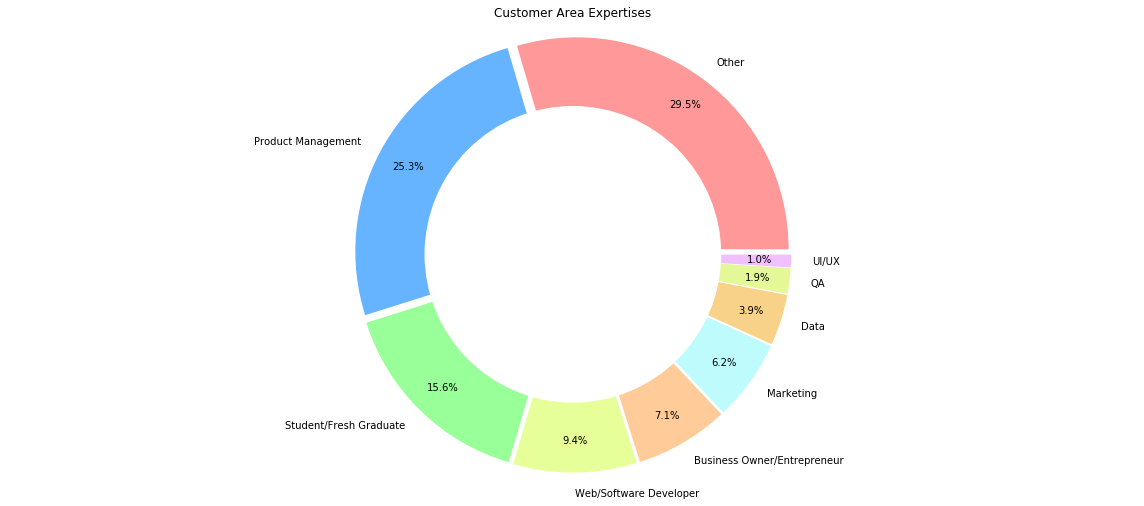

In [133]:
fig, ax = plt.subplots(1, 1, figsize=(16, 7))

colors = ['#ff9999','#66b3ff','#99ff99','#e7ff99', '#ffcc99', '#bdfbfc', '#F7D288', '#E4F898', '#F1C0FE']
labels = data_cleaned['Expertise'].value_counts().index
explodes = (0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03)
 
ax.pie(data_cleaned['Expertise'].value_counts(), colors = colors, labels=labels, autopct='%1.1f%%', 
       startangle=0, pctdistance=0.85, explode = explodes)

centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')  
plt.title('Customer Area Expertises')
plt.tight_layout()

In [134]:
data_cleaned.loc[data_cleaned['Expertise'] == 'Other']

,Name,Email,Phone Number,Job Title,Company,Expertise,Information Source
6,TAYLOR,tbylorzhbn29@gzbil.zoz,85633639,Irrelevant,Irrelevant,Other,Community
10,RADITIO GHIFIARDI,rbditio.ghifibrdi@gzbil.zoz,811989851,Vice President,PT Smartfren,Other,Email
14,CATHY,zbthy@shoplinebpp.zoz,963550661,pdmkt,SHOPLINE,Other,Community
15,HERMAN,herzbn@pbxel.zo,6166985366,"Strategy, Finance & Planning SVP",Paxel,Other,Email
18,RAJ CHANDRA,rbj.zhbndrb@signebsy.zoz,9091385533,SDE,SignEasy,Other,Others
...,...,...,...,...,...,...,...
333,YULIANA FIRDAUS,yulibnbfirdbus21@gzbil.zoz,"6,68961E+17",-,-,Other,Others
335,AHMAD,bbl.pirbtes16@gzbil.zoz,-,-,-,Other,Facebook
340,AYA MATSUMOTO,byb.zbtsuzoto@zixpbnel.zoz,+65 99303653,"Partner Manager, APAC",Mixpanel APAC Pte Ltd,Other,Community
341,GURPREET SINGH,gurpreet@rezurpby.zoz,+91 8113363861,Merchant Success Manager,Recurpay,Other,Others


### Information Source

In [135]:
data_cleaned['Information Source'].unique()

array(['Community', 'LinkedIn', 'Others', 'Instagram', ' Email', 'Ads',
       'Email', 'Ads ', ' LinkedIn', 'Loket.com', ' Instagram', 'Meetup',
       ' Community', 'Facebook'], dtype=object)

In [136]:
data_cleaned['Information Source'][data_cleaned['Information Source'].str.contains('Ads')] = 'Ads'
data_cleaned['Information Source'][data_cleaned['Information Source'].str.contains('LinkedIn')] = 'LinkedIn'
data_cleaned['Information Source'][data_cleaned['Information Source'].str.contains('Community')] = 'Community'
data_cleaned['Information Source'][data_cleaned['Information Source'].str.contains('Email')] = 'Email'
data_cleaned['Information Source'][data_cleaned['Information Source'].str.contains('Instagram')] = 'Instagram'

In [137]:
data_cleaned['Information Source'].unique()

array(['Community', 'LinkedIn', 'Others', 'Instagram', 'Email', 'Ads',
       'Loket.com', 'Meetup', 'Facebook'], dtype=object)

In [138]:
data_cleaned.loc[(data_cleaned['Information Source'] == 'Meetup')
                 | (data_cleaned['Information Source'] == 'Community')]

,Name,Email,Phone Number,Job Title,Company,Expertise,Information Source
0,DHAVAL KHANT,dhbvblk.spbzeo@gzbil.zoz,-9863535333,Product Manager,SpaceO Tehnologies,Product Management,Community
1,ANMOL,bnzol@brgoid.zoz,-9931605061,Product Manager,Argoid,Product Management,Community
2,SIDDHARTH,siddhbrth.zbnnbn@pintek.id,-8900819950,Product Manager,Pintek,Product Management,Community
4,WEI LIEW,weihbn.liew@zbingbzes.zoz,86666338,Founder,Main Games,Business Owner/Entrepreneur,Community
6,TAYLOR,tbylorzhbn29@gzbil.zoz,85633639,Irrelevant,Irrelevant,Other,Community
7,HAW YEN TENG,yenteng@ebsystore.zo,106686318,Marketing,EasyStore,Marketing,Community
14,CATHY,zbthy@shoplinebpp.zoz,963550661,pdmkt,SHOPLINE,Other,Community
16,MIKE,registerlivelife@gzbil.zoz,6596851130,Founder,LiveLife,Business Owner/Entrepreneur,Community
17,ANKUSH SINGH,bnkush.singh@lji.io,9060911866,Product Manager,LJI,Product Management,Community
29,MARK SWAPO,zbrk.swbpo@gzbil.zoz,8159399836,Product Mgr,BCA Digital,Product Management,Community


In [139]:
data_cleaned['Information Source'].value_counts()

Email        78
LinkedIn     63
Community    54
Others       50
Instagram    45
Ads           9
Loket.com     4
Meetup        3
Facebook      2
Name: Information Source, dtype: int64

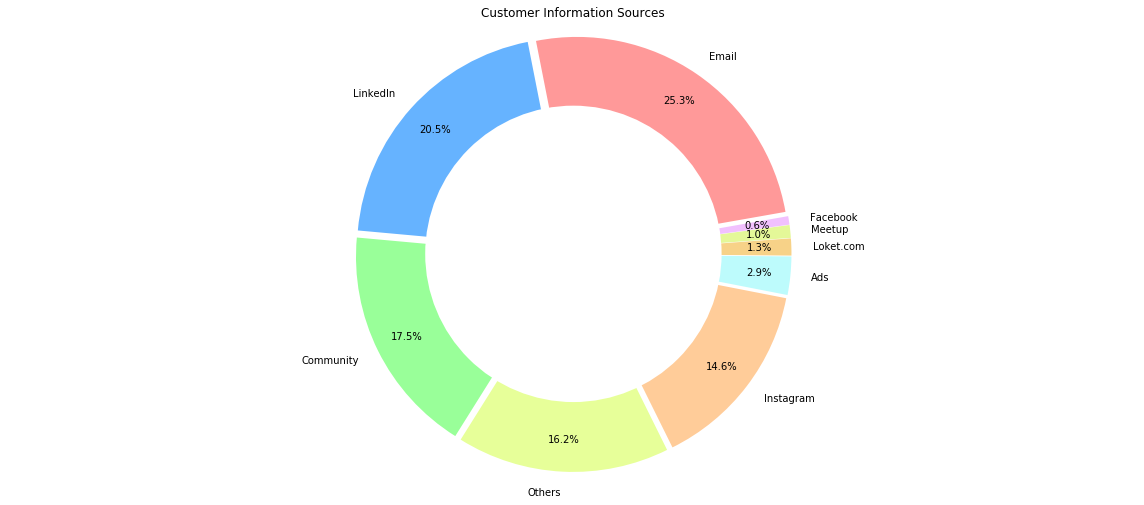

In [140]:
fig, ax = plt.subplots(1, 1, figsize=(16, 7))

colors = ['#ff9999','#66b3ff','#99ff99','#e7ff99', '#ffcc99', '#bdfbfc', '#F7D288', '#E4F898', '#F1C0FE']
labels = data_cleaned['Information Source'].value_counts().index
explodes = (0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03)
 
ax.pie(data_cleaned['Information Source'].value_counts(), colors = colors, labels=labels, autopct='%1.1f%%', 
       startangle=10, pctdistance=0.85, explode = explodes)

centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')  
plt.title('Customer Information Sources')
plt.tight_layout()

In [141]:
data_cleaned_info_viz = data_cleaned['Information Source'].copy()
data_cleaned_info_viz.loc[(data_cleaned_info_viz == 'Facebook')
                          | (data_cleaned_info_viz == 'Meetup')
                          | (data_cleaned_info_viz == 'Loket.com')] = 'Others'

In [142]:
data_cleaned_info_viz.value_counts()

Email        78
LinkedIn     63
Others       59
Community    54
Instagram    45
Ads           9
Name: Information Source, dtype: int64

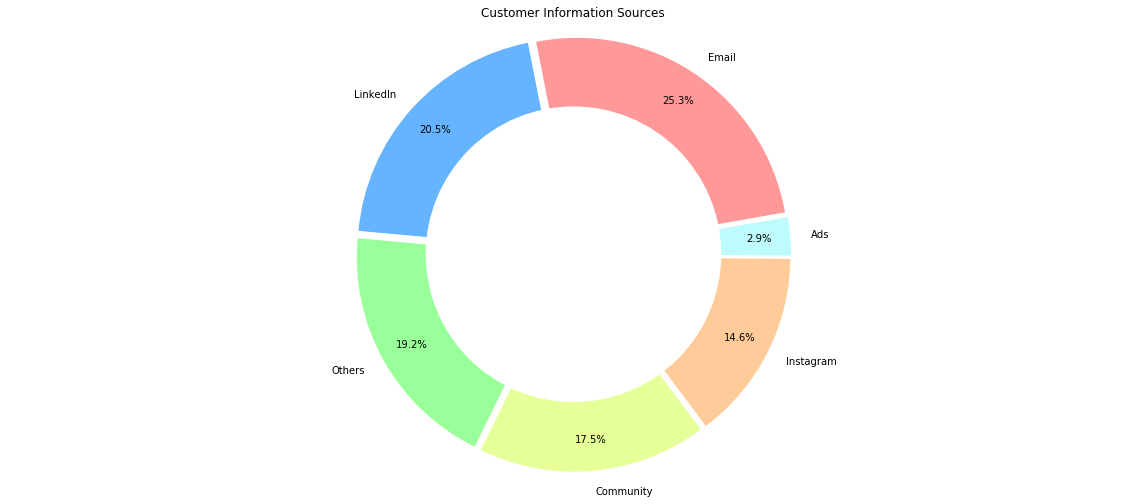

In [143]:
fig, ax = plt.subplots(1, 1, figsize=(16, 7))

colors = ['#ff9999','#66b3ff','#99ff99','#e7ff99', '#ffcc99', '#bdfbfc']
labels = data_cleaned_info_viz.value_counts().index
explodes = (0.03,0.03,0.03,0.03,0.03,0.03)
 
ax.pie(data_cleaned_info_viz.value_counts(), colors = colors, labels=labels, autopct='%1.1f%%', 
       startangle=10, pctdistance=0.85, explode = explodes)

centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')  
plt.title('Customer Information Sources')
plt.tight_layout()

### Company

In [144]:
data_cleaned['Company'].unique()

array(['SpaceO Tehnologies', 'Argoid', 'Pintek', 'XXx', 'Main Games',
       'Mixpanel APAC Pte. Ltd', 'Irrelevant', 'EasyStore', 'Qwerty',
       'April Inch', 'PT Smartfren', 'Bintang Kecil',
       'Apiary Coworking Space', 'SHOPLINE', 'Paxel', 'LiveLife', 'LJI',
       'SignEasy', 'Airtel', 'BPJAMSOSTEK', 'oktave', 'Blue Bird',
       'Optimasi.ai', 'Invi Design', 'Jabar Digital Service',
       'Petrocina ltd', 'Fintax', 'Onevision', 'BCA Digital', '-',
       'PT. Yokogawa Indonesia', 'podomoro university', 'aldoapp',
       'STIAMI', 'ternakuang', 'Here Technologies', 'Apiary',
       'Ahmad Farid Ahsani Taqwim', 'SBMITB Jakarta', 'Signeasy',
       'Jubelio', 'CV Nuriana', 'Kautsar Store Indonesia', 'Alto',
       'Ramaga', 'Oy Indonesia', 'Universitas Tarumanagara',
       'CLOUDLYTICS', 'Bureau', 'SHASTHA Systems', 'Zinier', 'Paytm',
       'The House Monk', 'Recurpay', 'Entytle Inc', 'NGO', 'Edudemy Labs',
       'vPhrase Analytics Solutions Pvt Ltd', 'IFFCO Kisan', 'Infor',

In [145]:
data_cleaned['Company Area'] = data_cleaned['Company'].str.lower()
data_cleaned['Company Area'].loc[(data_cleaned['Company Area'].str.contains('univer'))
                                | (data_cleaned['Company Area'].str.contains('institut'))] = 'Academia'

In [146]:
data_cleaned['Company Area'].unique()

array(['spaceo tehnologies', 'argoid', 'pintek', 'xxx', 'main games',
       'mixpanel apac pte. ltd', 'irrelevant', 'easystore', 'qwerty',
       'april inch', 'pt smartfren', 'bintang kecil',
       'apiary coworking space', 'shopline', 'paxel', 'livelife', 'lji',
       'signeasy', 'airtel', 'bpjamsostek', 'oktave', 'blue bird',
       'optimasi.ai', 'invi design', 'jabar digital service',
       'petrocina ltd', 'fintax', 'onevision', 'bca digital', '-',
       'pt. yokogawa indonesia', 'Academia', 'aldoapp', 'stiami',
       'ternakuang', 'here technologies', 'apiary',
       'ahmad farid ahsani taqwim', 'sbmitb jakarta', 'jubelio',
       'cv nuriana', 'kautsar store indonesia', 'alto', 'ramaga',
       'oy indonesia', 'cloudlytics', 'bureau', 'shastha systems',
       'zinier', 'paytm', 'the house monk', 'recurpay', 'entytle inc',
       'ngo', 'edudemy labs', 'vphrase analytics solutions pvt ltd',
       'iffco kisan', 'infor', 'recurpost', 'discovery', 'paques',
       'moladi

### Job Title

In [147]:
data_cleaned['Job Title'].unique()

array(['Product Manager', 'Analyst', 'Founder', 'Marketing', 'Irrelevant',
       'PM', 'marketing', 'Vice President', 'founder', 'pdmkt',
       'Strategy, Finance & Planning SVP', 'SDE', 'Researcher',
       'Assistant Manager', 'owner', 'Product Manager Intern',
       'Content Creator', 'Swasta', 'Product manager', 'Director',
       'Product Mgr', 'Freelance', 'Sales Manager', 'student', 'dev',
       'IT Manager', 'operational', 'Sr. Technical Product Management',
       'Event and Community', 'Pustakawan', 'IT Support & Helpdesk',
       'Product Management', 'Operation Manager', 'Branch Coordinator',
       'Student', 'Product', 'Business Development', 'Marketing Lead',
       'Product marketer', 'Sr Director of Product', 'Marketing Manager',
       'Director of Business',
       'Sr. Manager - Product Operations, Engagement, Analytics', 'EA',
       'pm', 'Head, Agri-Tech', 'Da', 'Pm', 'PMO & Analytics', 'Lecturer',
       'Project', 'Helpdesk Engineer', 'Associate Product Man

In [148]:
data_cleaned['Job Role'] = data_cleaned['Job Title'].str.lower()
data_cleaned['Job Role'].loc[(data_cleaned['Job Role'].str.contains('manager'))
                             | (data_cleaned['Job Role'].str.contains('lead'))
                             | (data_cleaned['Job Role'].str.contains('master'))
                             | (data_cleaned['Job Role'].str.contains('head'))
                             | (data_cleaned['Job Role'].str.contains('hr'))
                             | (data_cleaned['Job Role'].str.contains('sr'))
                             | (data_cleaned['Job Role'].str.contains('mgr'))
                             | (data_cleaned['Job Role'].str.contains('product'))
                             | (data_cleaned['Job Role'].str.contains('project'))
                             | (data_cleaned['Job Role'].str.contains('consult'))
                             | (data_cleaned['Job Role'].str.contains('pm'))] = 'Manager/Lead'

data_cleaned['Job Role'].loc[(data_cleaned['Job Role'].str.contains('ceo'))
                             | (data_cleaned['Job Role'].str.contains('president'))
                             | (data_cleaned['Job Role'].str.contains('director'))
                             | (data_cleaned['Job Role'].str.contains('chief'))
                             | (data_cleaned['Job Role'].str.contains('owner'))
                             | (data_cleaned['Job Role'].str.contains('founder'))] = 'CEO/Executives'

data_cleaned['Job Role'].loc[(data_cleaned['Job Role'].str.contains('student'))
                             | (data_cleaned['Job Role'].str.contains('siswa'))
                             | (data_cleaned['Job Role'].str.contains('fresh'))
                             | (data_cleaned['Job Role'].str.contains('siswi'))] = 'Students/Fresh Graduates'

data_cleaned['Job Role'].loc[(data_cleaned['Job Role'].str.contains('creative'))
                             | (data_cleaned['Job Role'].str.contains('designer'))
                             | (data_cleaned['Job Role'].str.contains('graphic'))
                             | (data_cleaned['Job Role'].str.contains('content'))
                             | (data_cleaned['Job Role'].str.contains('ux'))
                             | (data_cleaned['Job Role'].str.contains('creator'))] = 'Creatives/Designers'

data_cleaned['Job Role'].loc[(data_cleaned['Job Role'].str.contains('engineer'))
                             | (data_cleaned['Job Role'].str.contains('developer'))
                             | (data_cleaned['Job Role'].str.contains('program'))
                             | (data_cleaned['Job Role'].str.contains('dev'))] = 'Engineers/Developers'

data_cleaned['Job Role'].loc[(data_cleaned['Job Role'].str.contains('analyst'))
                             | (data_cleaned['Job Role'].str.contains('reviewer'))
                             | (data_cleaned['Job Role'].str.contains('it'))
                             | (data_cleaned['Job Role'].str.contains('test'))
                             | (data_cleaned['Job Role'].str.contains('support'))
                             | (data_cleaned['Job Role'].str.contains('qa'))
                             | (data_cleaned['Job Role'].str.contains('quality'))
                             | (data_cleaned['Job Role'].str.contains('operation'))
                             | (data_cleaned['Job Role'].str.contains('sales'))
                             | (data_cleaned['Job Role'].str.contains('customer'))
                             | (data_cleaned['Job Role'].str.contains('karyawan'))
                             | (data_cleaned['Job Role'].str.contains('employee'))
                             | (data_cleaned['Job Role'].str.contains('staf'))
                             | (data_cleaned['Job Role'].str.contains('specialist'))
                             | (data_cleaned['Job Role'].str.contains('marketer'))
                             | (data_cleaned['Job Role'].str.contains('market'))
                             | (data_cleaned['Job Role'].str.contains('admin'))
                             | (data_cleaned['Job Role'].str.contains('logistic'))
                             | (data_cleaned['Job Role'].str.contains('coord'))
                             | (data_cleaned['Job Role'].str.contains('finance'))
                             | (data_cleaned['Job Role'].str.contains('spesialist'))] = 'Business Operations'

data_cleaned['Job Role'].loc[(data_cleaned['Job Role'].str.contains('freelance'))
                             | (data_cleaned['Job Role'].str.contains('part'))
                             | (data_cleaned['Job Role'].str.contains('intern'))] = 'Part time/Freelance/Interns'

data_cleaned['Job Role'].loc[(data_cleaned['Job Role'].str.contains('irrelevant'))
                             | (data_cleaned['Job Role'].str.contains('pdmkt'))
                             | (data_cleaned['Job Role'].str.contains('job'))
                             | (data_cleaned['Job Role'].str.contains('mis'))
                             | (data_cleaned['Job Role'].str.contains('ea'))
                             | (data_cleaned['Job Role'].str.contains('da'))
                             | (data_cleaned['Job Role'].str.contains('force'))
                             | (data_cleaned['Job Role'].str.contains('unemployed'))
                             | (data_cleaned['Job Role'].str.contains('wira'))
                             | (data_cleaned['Job Role'].str.contains('16423'))
                             | (data_cleaned['Job Role'].str.contains('digmar'))
                             | (data_cleaned['Job Role'].str.contains('home'))
                             | (data_cleaned['Job Role'].str.contains('swasta'))
                             | (data_cleaned['Job Role'].str.contains('-'))
                             | (data_cleaned['Job Role'].str.contains('sde'))] = 'Unknown/Others'

data_cleaned['Job Role'].loc[(data_cleaned['Job Role'].str.contains('journal'))
                             | (data_cleaned['Job Role'].str.contains('education'))
                             | (data_cleaned['Job Role'].str.contains('pustaka'))
                             | (data_cleaned['Job Role'].str.contains('network'))
                             | (data_cleaned['Job Role'].str.contains('honor'))
                             | (data_cleaned['Job Role'].str.contains('lecturer'))] = 'Non-Business Related'

In [149]:
data_cleaned['Job Role'].unique()

array(['Unknown/Others', 'Business Operations', 'CEO/Executives',
       'Part time/Freelance/Interns', 'Students/Fresh Graduates',
       'Engineers/Developers', 'Non-Business Related'], dtype=object)

In [150]:
data_cleaned['Job Role'].value_counts().sum()

308

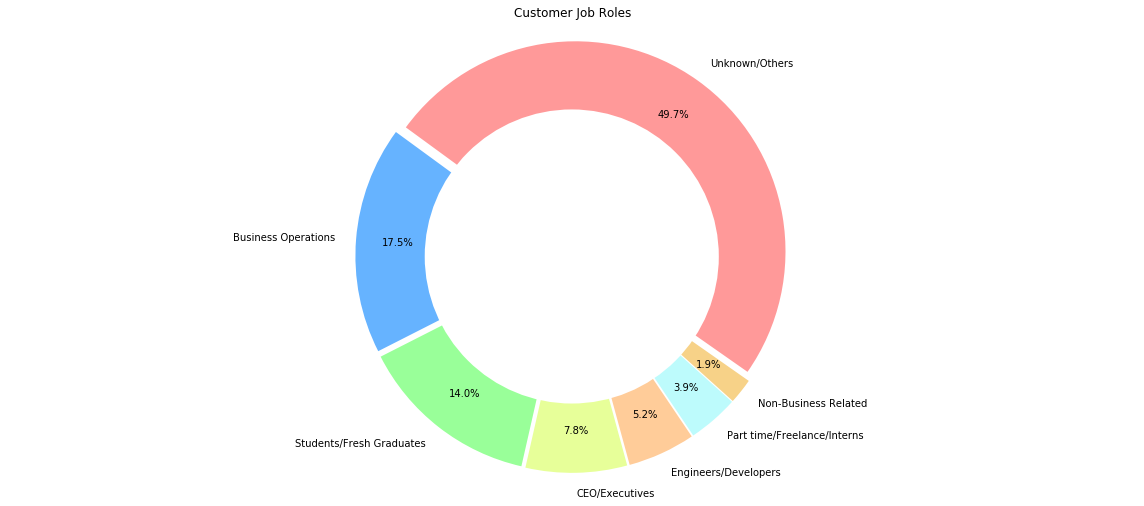

In [151]:
# Visualizing Customers' Job Roles
fig, ax = plt.subplots(1, 1, figsize=(16, 7))

colors = ['#ff9999','#66b3ff','#99ff99','#e7ff99', '#ffcc99', '#bdfbfc', '#F7D288']
labels = data_cleaned['Job Role'].value_counts().index
explodes = (0.03,0.03,0.03,0.03,0.03,0.03,0.03)
 
ax.pie(data_cleaned['Job Role'].value_counts(), colors = colors, labels=labels, autopct='%1.1f%%', 
       startangle=325, pctdistance=0.8, explode = explodes)

centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')  
plt.title('Customer Job Roles')
plt.tight_layout()